In [1]:
from ml import *

In [2]:
df = pd.read_csv('/data/datasets/occupancy/datatraining.txt')

In [3]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [4]:
df.date = pd.to_datetime(df.date)

Very quickly check if all data is there (no gaps)

In [5]:
sec = ((df.date).astype(int) / 1e9).astype(int)

In [6]:
min((sec - sec.shift(1)).dropna())

59.0

In [7]:
max((sec - sec.shift(1)).dropna())

61.0

In [8]:
y = df.Occupancy
X = df[['CO2', 'HumidityRatio']]

In [9]:
train_X = X[:7000]
valid_X = X[7000:]
train_y = y[:7000]
valid_y = y[7000:]

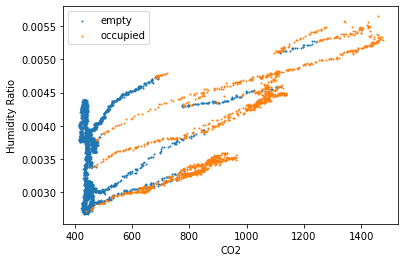

In [12]:
train_X0 = train_X[train_y == 0]
train_X1 = train_X[train_y == 1]

plt.scatter(train_X0.CO2, train_X0.HumidityRatio, label='empty', s=1)
plt.scatter(train_X1.CO2, train_X1.HumidityRatio, label='occupied', s=1)
plt.ylabel('Humidity Ratio')
plt.xlabel('CO2')
plt.legend();


In [13]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
valid_X = scaler.transform(valid_X)

In [14]:
model = LogisticRegression()
model.fit(train_X, train_y)
f1_score(valid_y, model.predict(valid_X))

0.6858974358974359

In [15]:
df['co_delta'] = df.CO2 - df.CO2.shift(20)

In [16]:
df['humid_delta'] = df.HumidityRatio - df.HumidityRatio.shift(20)

In [17]:
df.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,co_delta,humid_delta
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,186.500000,0.000308
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1,166.500000,0.000228
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1,167.500000,0.000279
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1,184.333333,0.000327
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1,184.250000,0.000244


In [18]:
y = df.dropna().Occupancy
X = df.dropna()[['co_delta', 'humid_delta', 'CO2', 'HumidityRatio']]

In [19]:
train_X = X[:7000]
valid_X = X[7000:]
train_y = y[:7000]
valid_y = y[7000:]

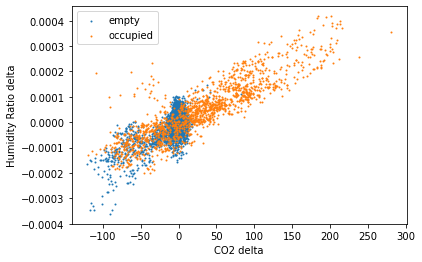

In [20]:
train_X0 = train_X[train_y == 0]
train_X1 = train_X[train_y == 1]

plt.scatter(train_X0.co_delta, train_X0.humid_delta, label='empty', s=1)
plt.scatter(train_X1.co_delta, train_X1.humid_delta, label='occupied', s=1)
plt.ylabel('Humidity Ratio delta')
plt.xlabel('CO2 delta')
plt.legend();

In [21]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
valid_X = scaler.transform(valid_X)

In [22]:
model = LogisticRegression()
model.fit(train_X, train_y)
f1_score(valid_y, model.predict(valid_X))

0.8029465930018417

In [27]:
recall_score(valid_y, model.predict(valid_X))

0.8790322580645161

In [24]:
precision_score(trvalid_y, model.predict(valid_X))

0.7389830508474576

In [25]:
sum(valid_y)/len(valid_y)

0.22083704363312556